In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context('poster')
sns.set_style("whitegrid")

In [27]:
import math

# function to print series of n elements that has specified mean and standard deviation d
def series(n, mean, d): 
    ret_lst = []
    # if S.D. is 0 then print all 
    # elements as 0. 
    if d == 0: 
        # print n 0's 
        for i in range(n): 
            ret_lst.append(0)
#             print("0", end = ' ') 
        return 1
          
    # if S.D. is even 
    if n % 2 == 0: 
        # print -SD, +SD, -SD, +SD 
        i = 1
        while i <= n: 
            ret_lst.append((math.pow(-1, i) * d))
#             print("%.5f"%((math.pow(-1, i) * d)), 
#                   end =' ') 
            i += 1
    else: 
        # if odd 
        # convert n to a float integer 
        m = n 
        r = (m / (m - 1)) 
        g = (float)(d * float(math.sqrt(r))) 
          
        # print one element to be 0 
        ret_lst.append(0)
#         print("0 ", end = ' ') 
          
        # print (n-1) elements as xi derived 
        # from the formula 
        i = 1
        while i < n: 
            ret_lst.append(math.pow(-1, i) * g)
#             print("%.5f"%(math.pow(-1, i) * g), 
#                   end = ' ') 
            i = i + 1
#     print("\n") 
    return [i + mean for i in ret_lst]

In [28]:
import json
import statistics 

numVotes = [1, 5, 10, 15]
examples = ['Civitas', 'OTP']
performanceDifference = []

for vote in numVotes:
    for example in examples:
        with open('{}-{}Vote.txt'.format(example, vote)) as json_file:
            example_data = json.load(json_file)
        with open('{}PBaseline-{}Vote.txt'.format(example, vote)) as json_file:
            example_p_baseline_data = json.load(json_file)

        for key in example_data.keys():
            lst = example_data[key] 
    #         print(key)
    #         print('Civitas Mean {}:'.format(vote))
            example_mean = float(sum(lst))/len(lst)
    #         print(civitas_mean)

        for key in example_p_baseline_data.keys():
            lst = example_p_baseline_data[key] 
    #         print(key)
    #         print('Civitas P Baseline Mean {}:'.format(vote))
            example_p_baseline_mean = float(sum(lst))/len(lst)
    #         print(civitas_p_baseline_mean)

        performanceDifference.append((vote, example_mean/example_p_baseline_mean, example))
performanceDifference = pd.DataFrame(performanceDifference, columns = ['Number of Votes/OTP Codes Sent' , 'Performance Overhead', 'Example']) 
print(performanceDifference)



   Number of Votes/OTP Codes Sent  Performance Overhead  Example
0                               1              3.610530  Civitas
1                               1              9.695898      OTP
2                               5              3.272002  Civitas
3                               5              5.435897      OTP
4                              10              2.682984  Civitas
5                              10              4.413406      OTP
6                              15              2.835650  Civitas
7                              15              3.320303      OTP


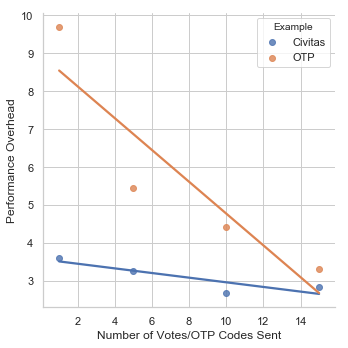

In [29]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
# sns.set_context('poster')
sns.set_style("whitegrid")

sns.lmplot(x="Number of Votes/OTP Codes Sent", y="Performance Overhead", hue='Example', data=performanceDifference,
           ci=None, legend_out=False)

ax = plt.gca()
# ax.set_xlabel('Create')
# ymin = 2.5
# ylimit = 4
# xlimit = 15.5
# plt.ylim(ymin, ylimit)
# plt.yticks(np.arange(ymin, ylimit + 0.5, 0.5))
# plt.xlim(0, xlimit)
# plt.xticks(np.arange(0, xlimit + 1, 5))

plt.savefig('PSecCivitasOTPOverheadComparision.png',dpi=500)
